In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os

print(tf.__version__)

2.4.1


In [91]:
features = pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [92]:
temp_1 = features.loc[:, 'temp_1']
temp_2 = features.loc[:, 'temp_2']
actual = features.loc[:, 'actual']
friend = features.loc[:, 'friend']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f911672b850>,
      dtype=object)

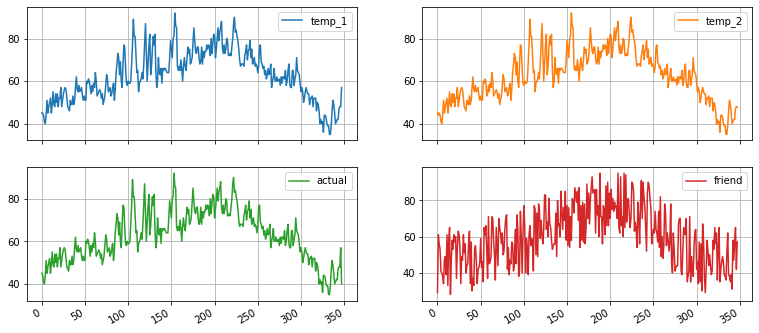

In [93]:
dfs = pd.concat([temp_1, temp_2, actual, friend], axis=1)
dfs.plot(subplots=True, grid=True, figsize=(13, 6), layout=(2, 2))

In [94]:
features.drop(columns='week', inplace=True)

In [95]:
features

,year,month,day,temp_2,temp_1,average,actual,friend
0,2016,1,1,45,45,45.6,45,29
1,2016,1,2,44,45,45.7,44,61
2,2016,1,3,45,44,45.8,41,56
3,2016,1,4,44,41,45.9,40,53
4,2016,1,5,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,47
344,2016,12,28,42,47,45.3,48,58
345,2016,12,29,47,48,45.3,48,65
346,2016,12,30,48,48,45.4,57,42


In [96]:
y_labels = np.array(features['actual'])
y_labels.shape

(348,)

In [97]:
x_input = np.array(features.drop(columns='actual').reset_index())
x_input.shape

(348, 8)

In [98]:
x_scaled_input = preprocessing.StandardScaler().fit_transform(x_input)

In [99]:
model = keras.Sequential()
model.add(keras.layers.Dense(16,
kernel_initializer=keras.initializers.random_normal))
model.add(keras.layers.Dense(32,
kernel_initializer=keras.initializers.random_normal))
model.add(keras.layers.Dense(1,
kernel_initializer=keras.initializers.random_normal))

In [100]:
model.compile(optimizer=keras.optimizers.SGD(0.001), loss='mean_squared_error')

In [101]:
history = model.fit(x=x_scaled_input, y=y_labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 1s 81ms/step - loss: 4397.0287 - val_loss: 2868.4407
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 4277.6484 - val_loss: 2783.2803
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 4183.9923 - val_loss: 2659.3806
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 3881.0562 - val_loss: 2527.6367
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 2315.9697 - val_loss: 3478.9419
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 200.6466 - val_loss: 2621.8374
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 94.5953 - val_loss: 1948.9989
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 54.4414 - val_loss: 1296.4067
Epoch 9/100
5/5 [==============================] - 0s 11ms/step - loss: 117.4908 - val_loss: 1187.6986
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - los

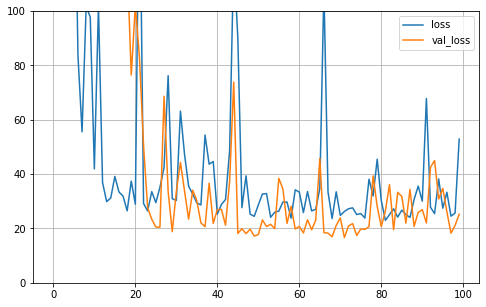

In [102]:
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True, ylim=(0, 100))